In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Text(0.5, 1.0, 'Rings')

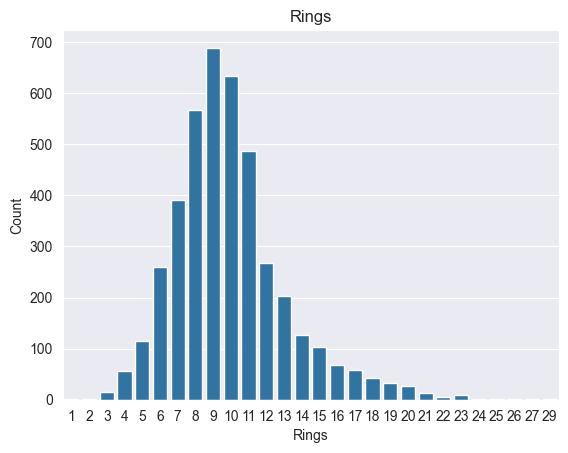

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [4]:
X=df.drop('Rings',axis=1)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
id,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [5]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [6]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

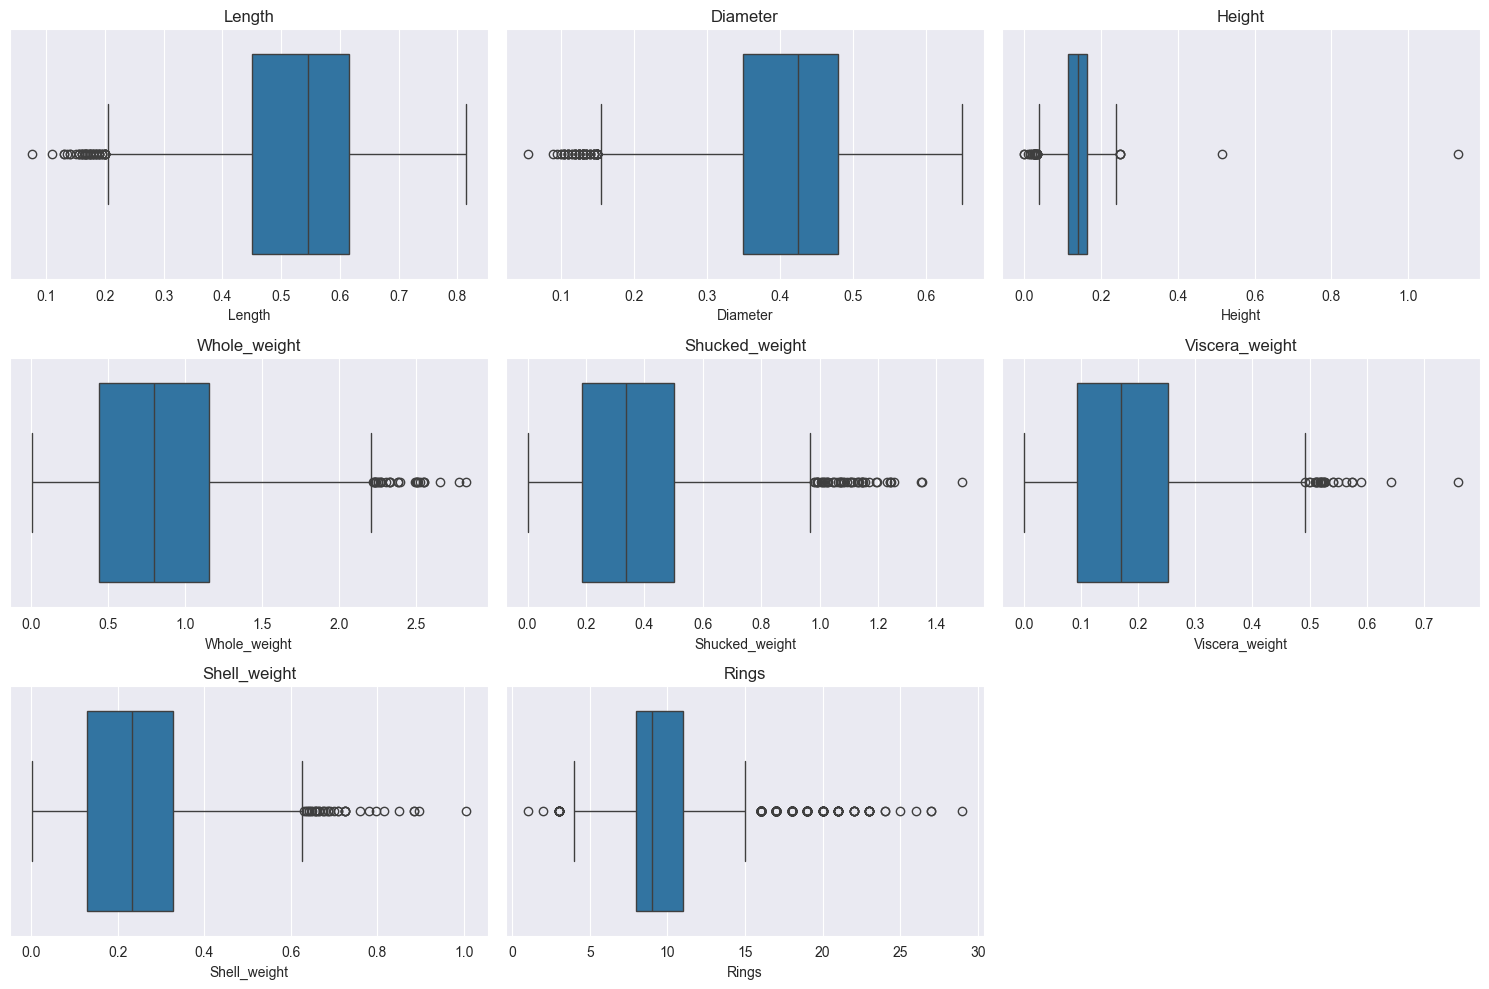

In [7]:
# 데이터프레임의 수치형 칼럼들을 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯을 각 수치형 칼럼에 대해 반복적으로 그리기
plt.figure(figsize=(15, 10))  # 적절한 사이즈로 설정
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(x=column, data=df)
    plt.title(column)

plt.tight_layout()  # 레이아웃 조정
plt.show()

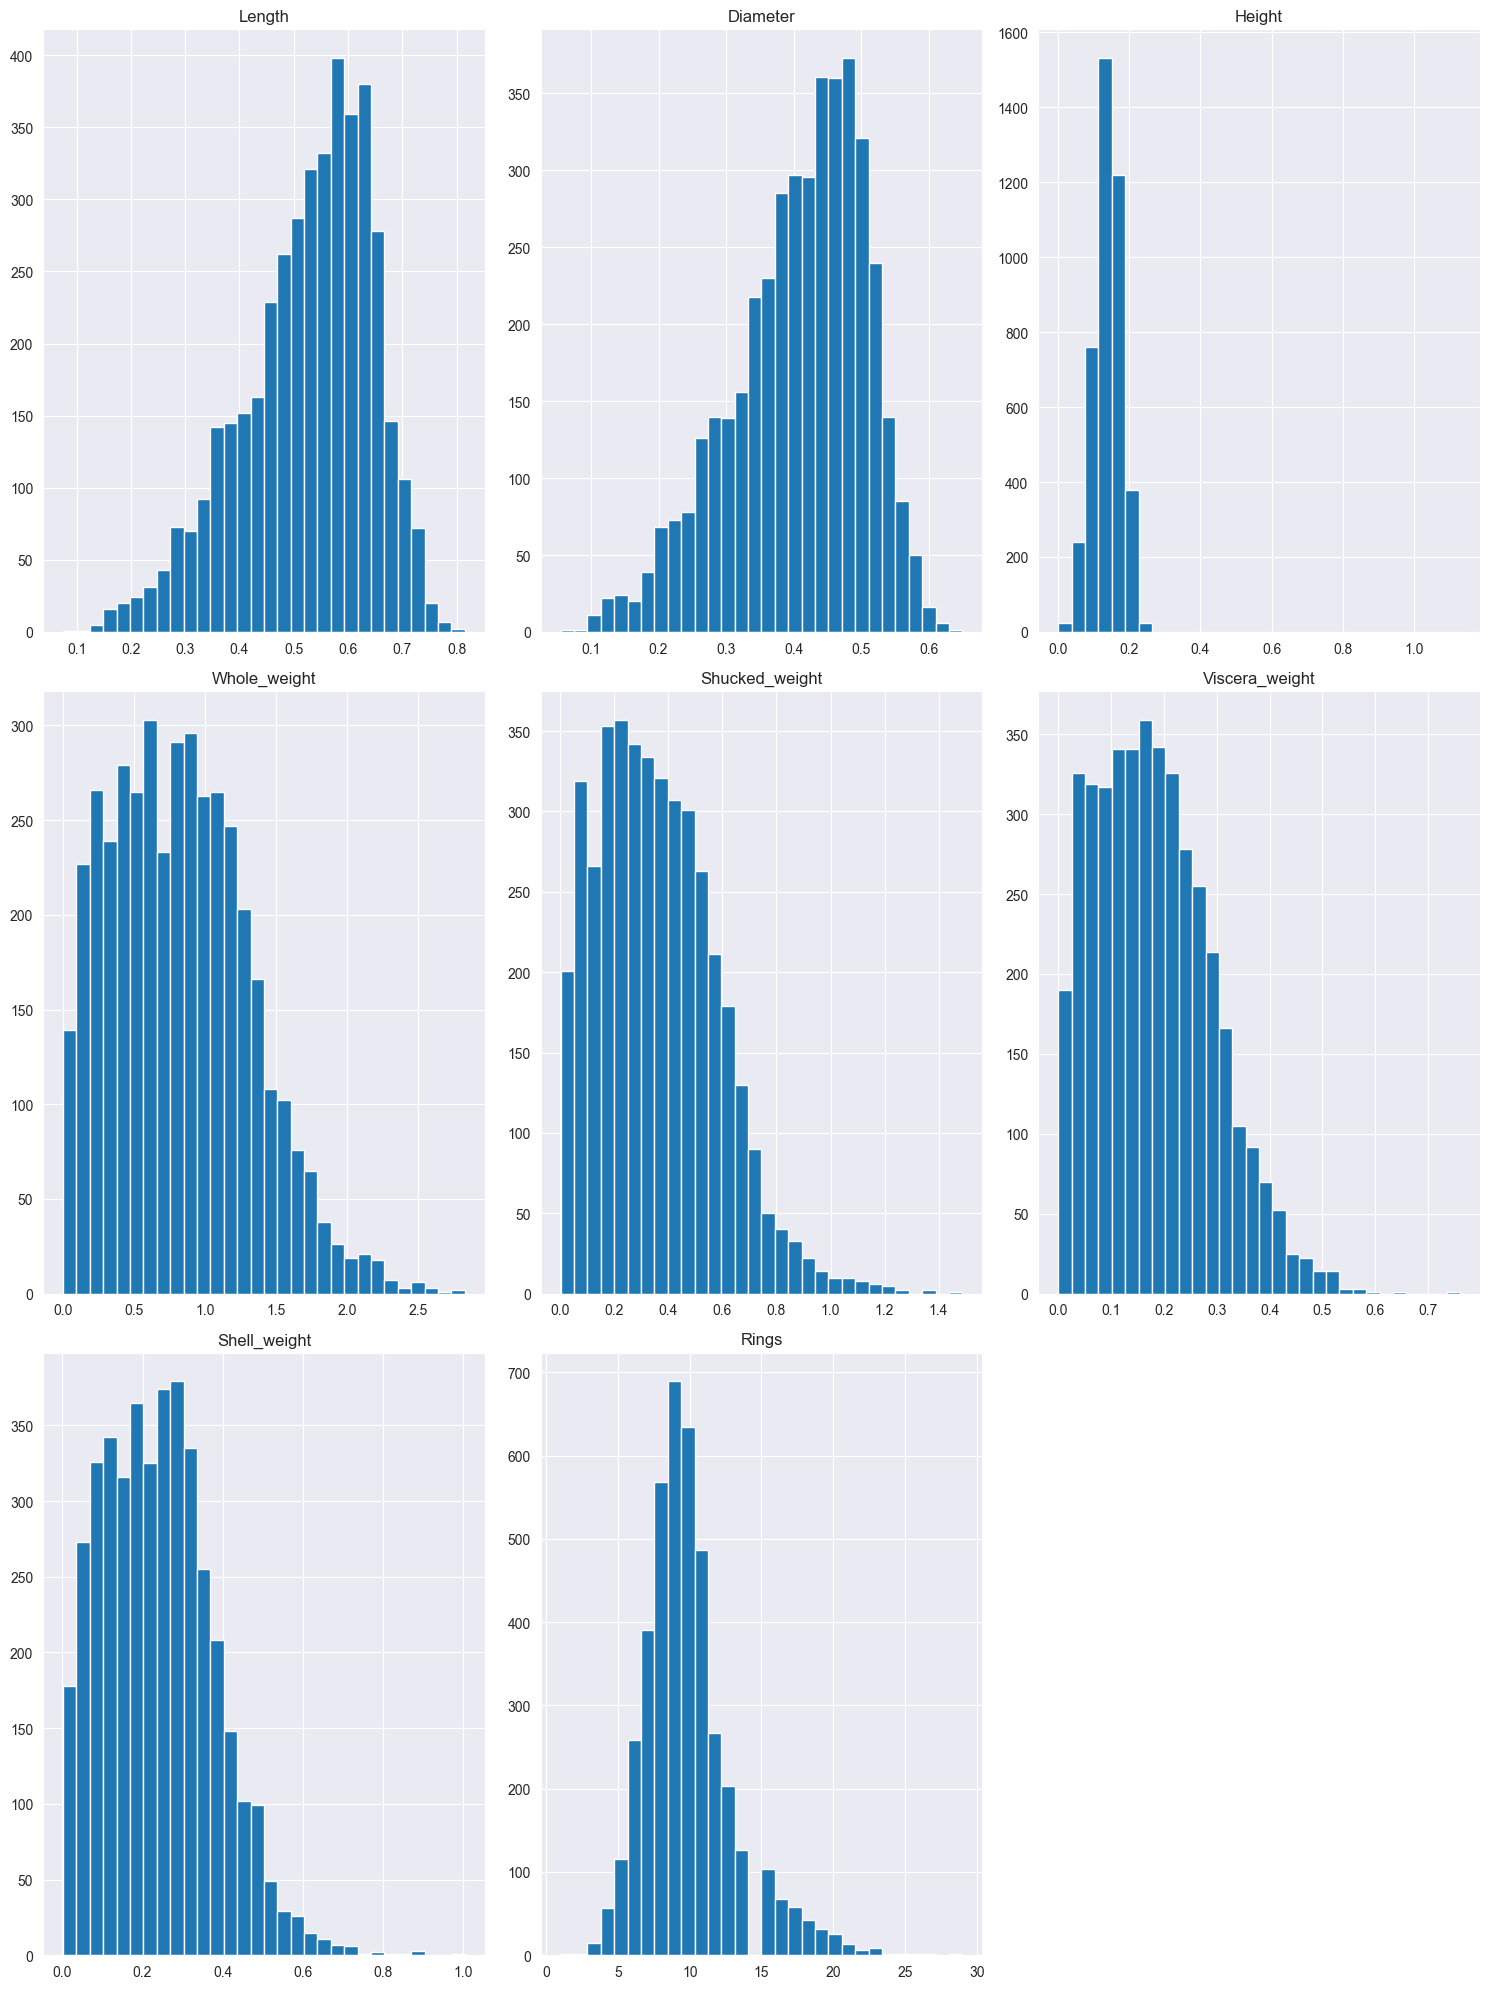

In [8]:
# 각 컬럼별 히스토그램을 그리는 코드
df.hist(figsize=(15, 20), bins=30)  # ax 인수 없이 자동으로 서브플롯 생성
plt.tight_layout()  # 서브플롯 간격을 자동으로 조정
plt.show()

In [9]:
X = X.values
X.shape

(4177, 9)

In [10]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
print(X.dtype)
print(Y.dtype)

object
float32


In [12]:
X=X.astype('float32')
X.dtype

dtype('float32')

In [13]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# 윈도우 크기를 설정하고, 데이터를 3차원으로 변환 (타임스텝 적용)
def create_windows(X, y, window_size):
    X_windows = []
    y_windows = []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i+window_size])  # window_size만큼의 과거 데이터를 사용
        y_windows.append(y[i+window_size])    # 그 다음 값을 예측
    return np.array(X_windows), np.array(y_windows)

In [15]:
window_size = 3  # 3개의 타임스텝을 사용
X_windows, Y_windows = create_windows(X_scaled, Y, window_size)
print (X_windows)
print (Y_windows)

[[[0.5135135  0.5210085  0.08407079 ... 0.14798208 0.         1.        ]
  [0.37162164 0.35294116 0.07964602 ... 0.06826109 0.         1.        ]
  [0.6148648  0.6134454  0.11946903 ... 0.20777279 0.         0.        ]]

 [[0.37162164 0.35294116 0.07964602 ... 0.06826109 0.         1.        ]
  [0.6148648  0.6134454  0.11946903 ... 0.20777279 0.         0.        ]
  [0.49324325 0.5210085  0.11061947 ... 0.15296464 0.         1.        ]]

 [[0.6148648  0.6134454  0.11946903 ... 0.20777279 0.         0.        ]
  [0.49324325 0.5210085  0.11061947 ... 0.15296464 0.         1.        ]
  [0.34459463 0.3361345  0.07079646 ... 0.0533134  1.         0.        ]]

 ...

 [[0.6554054  0.6302522  0.13716814 ... 0.22670653 0.         1.        ]
  [0.6621621  0.66386557 0.1460177  ... 0.24663678 0.         0.        ]
  [0.6959459  0.6470589  0.11946903 ... 0.2580967  0.         1.        ]]

 [[0.6621621  0.66386557 0.1460177  ... 0.24663678 0.         0.        ]
  [0.6959459  0.6470589 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_windows, Y_windows, test_size=0.2, random_state=0)

In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, X_train.shape[2])))  # 타임스텝=1, 특성 수=11
model.add(Dense(30, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/50


2024-09-25 22:07:57.492820: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


105/105 [==============================] - 1s 3ms/step - loss: 2.9310 - accuracy: 0.1563 - val_loss: 2.4856 - val_accuracy: 0.1760
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 2.4234 - accuracy: 0.1962 - val_loss: 2.3671 - val_accuracy: 0.1952
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 2.3486 - accuracy: 0.2081 - val_loss: 2.3263 - val_accuracy: 0.2240
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 2.3184 - accuracy: 0.2195 - val_loss: 2.2966 - val_accuracy: 0.2323
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 2.2941 - accuracy: 0.2237 - val_loss: 2.2848 - val_accuracy: 0.2072
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 2.2753 - accuracy: 0.2249 - val_loss: 2.2666 - val_accuracy: 0.2443
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 2.2583 - accuracy: 0.2273 - val_loss: 2.2593 - val_accuracy: 0.2419
Epoch 8/50
105/10

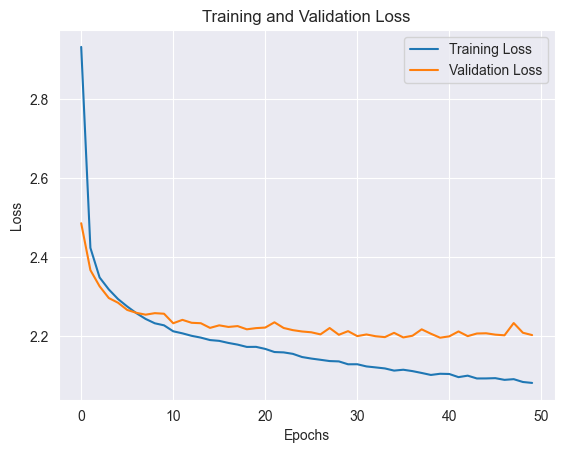

In [19]:
# Loss 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

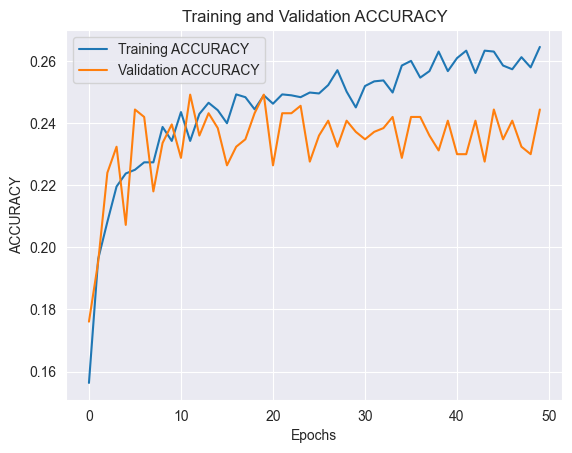

In [20]:
# 결과 시각화 (MAE)
plt.plot(history.history['accuracy'], label='Training ACCURACY')
plt.plot(history.history['val_accuracy'], label='Validation ACCURACY')
plt.title('Training and Validation ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

In [21]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.09      0.11      0.10         9
           5       0.07      0.04      0.05        24
           6       0.38      0.23      0.29        52
           7       0.26      0.34      0.29        76
           8       0.33      0.35      0.34       111
           9       0.28      0.22      0.25       138
          10       0.23      0.41      0.30       126
          11       0.26      0.34      0.29       105
          12       0.09      0.07      0.08        44
          13       0.07      0.06      0.06        52
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        11
          17       0.00      0.00      0.00        15
          18       0.00      0.00      0.00         1
          19       0.00    